<a href="https://colab.research.google.com/github/fawziafaraag/machine-learning-II/blob/main/DBSCAN_Class_18_Blank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

In [ ]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

d1.head()



,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


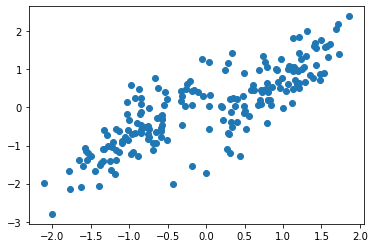

In [ ]:
# dbscan and plot
plt.scatter(d1['x'], d1['y'])


In [ ]:
clustering = DBSCAN(eps=0.4, min_samples=5).fit(d1)

In [ ]:
clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

NearestNeighbors(n_neighbors=1)

In [ ]:
NearestNeighbors(n_neighbors=1)
print(neigh.kneighbors([[0.1,0,0.1]]))

(array([[0.14142136]]), array([[0]]))


In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(d1)
distances, indices = nbrs.kneighbors(d1)

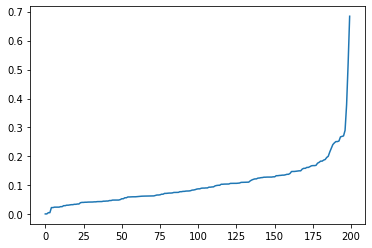

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
dbscancluster = DBSCAN(eps=0.4, min_samples=5)
dbscancluster.fit(d1)

DBSCAN(eps=0.4)

In [ ]:
clusters = dbscancluster.labels_

In [ ]:
len(set(clusters))

2

In [ ]:
silhouette_score(d1,clusters)

0.27092224205064136

In [ ]:
d1['cluster']=clustering.labels_

In [ ]:
d1.cluster.value_counts().to_frame()

,cluster
0,191
-1,9


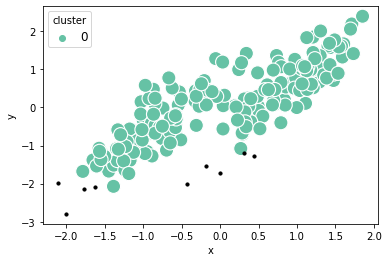

In [ ]:
# grab only clustered data points
outliers = d1[d1['cluster']==-1]

fig,(axes) = plt.subplots(1,1)
axes.legend()
sns.scatterplot('x', 'y',data=d1[d1['cluster']!=-1], hue='cluster', ax=axes, palette='Set2', legend='full', s=200)
axes.scatter(outliers['x'], outliers['y'], s=10, label='outliers', c="k")
plt.setp(axes.get_legend().get_texts(), fontsize='12')
plt.show()




In [ ]:
# overall 


## Dataset 2

In [ ]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

d2.head()

,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589


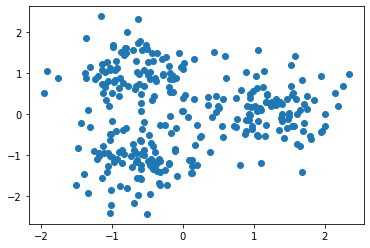

In [ ]:
plt.scatter(d2['x'], d2['y'])

In [ ]:
clustering = DBSCAN(eps=0.4, min_samples=5).fit(d2)

In [ ]:
clustering.labels_

array([-1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0

In [ ]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

NearestNeighbors(n_neighbors=1)

In [ ]:
NearestNeighbors(n_neighbors=1)
print(neigh.kneighbors([[0.1,0,0.1]]))

(array([[0.14142136]]), array([[0]]))


In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(d2)
distances, indices = nbrs.kneighbors(d2)

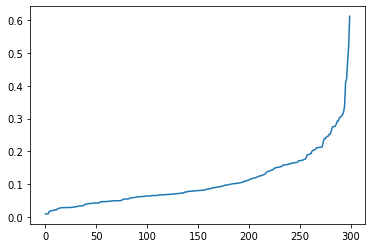

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
dbscancluster = DBSCAN(eps=0.4, min_samples=5)
dbscancluster.fit(d2)

DBSCAN(eps=0.4)

In [ ]:
clusters = dbscancluster.labels_

In [ ]:
len(set(clusters))

2

In [ ]:
silhouette_score(d2,clusters)

0.31498115028341045

In [ ]:
d2['cluster']=clustering.labels_

In [ ]:
d2.cluster.value_counts().to_frame()

,cluster
0,285
-1,15


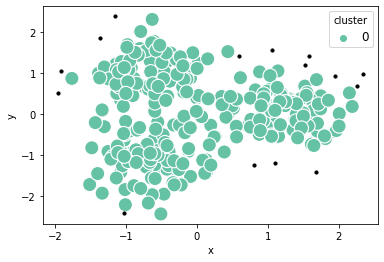

In [ ]:
# grab only clustered data points
outliers = d2[d2['cluster']==-1]

fig,(axes) = plt.subplots(1,1)
axes.legend()
sns.scatterplot('x', 'y',data=d2[d2['cluster']!=-1], hue='cluster', ax=axes, palette='Set2', legend='full', s=200)
axes.scatter(outliers['x'], outliers['y'], s=10, label='outliers', c="k")
plt.setp(axes.get_legend().get_texts(), fontsize='12')
plt.show()




## Dataset 3

In [ ]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")
d3.head()


,x,y
0,1.332228,0.178299
1,1.256056,0.146765
2,1.477661,0.155054
3,1.384840,0.022054
4,1.526956,0.267920


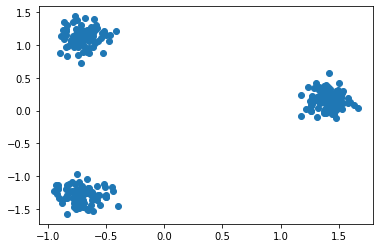

In [ ]:
plt.scatter(d3['x'], d3['y'])

In [ ]:
clustering = DBSCAN(eps=0.4, min_samples=5).fit(d3)

In [ ]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

NearestNeighbors(n_neighbors=1)

In [ ]:
NearestNeighbors(n_neighbors=1)
print(neigh.kneighbors([[0.1,0,0.1]]))

(array([[0.14142136]]), array([[0]]))


In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(d3)
distances, indices = nbrs.kneighbors(d3)

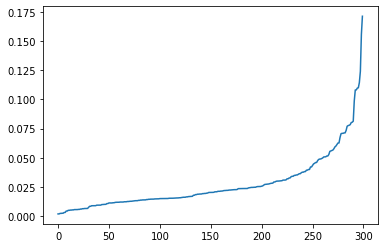

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
dbscancluster = DBSCAN(eps=0.125, min_samples=5)
dbscancluster.fit(d3)

DBSCAN(eps=0.125)

In [ ]:
clusters = dbscancluster.labels_

In [ ]:
len(set(clusters))

4

In [ ]:
silhouette_score(d3,clusters)

0.8718435723469897

In [ ]:
d3['cluster']=clustering.labels_

In [ ]:
d3.cluster.value_counts().to_frame()

,cluster
0,100
1,100
2,100


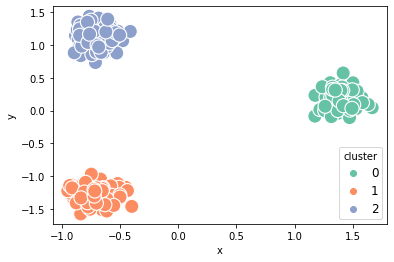

In [ ]:
# grab only clustered data points
outliers = d3[d3['cluster']==-1]

fig,(axes) = plt.subplots(1,1)
axes.legend()
sns.scatterplot('x', 'y',data=d3[d3['cluster']!=-1], hue='cluster', ax=axes, palette='Set2', legend='full', s=200)
axes.scatter(outliers['x'], outliers['y'], s=10, label='outliers', c="k")
plt.setp(axes.get_legend().get_texts(), fontsize='12')
plt.show()




## Dataset 4

In [ ]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")
d4.head()

,x,y
0,-0.006848,0.395527
1,0.314820,-0.289261
2,0.171705,1.078077
3,-1.203661,1.325926
4,-0.179379,-0.036615


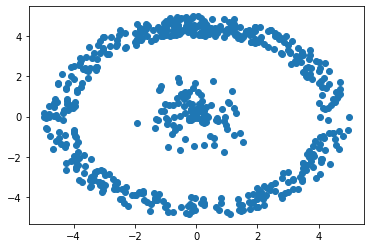

In [ ]:
plt.scatter(d4['x'], d4['y'])

In [ ]:
clustering = DBSCAN(eps=0.3, min_samples=5).fit(d4)

In [ ]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

NearestNeighbors(n_neighbors=1)

In [ ]:
NearestNeighbors(n_neighbors=1)
print(neigh.kneighbors([[0.1,0,0.1]]))

(array([[0.14142136]]), array([[0]]))


In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(d4)
distances, indices = nbrs.kneighbors(d4)

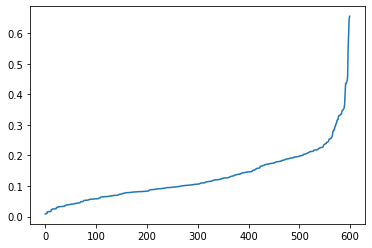

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
dbscancluster = DBSCAN(eps=0.3, min_samples=5)
dbscancluster.fit(d4)

DBSCAN(eps=0.3)

In [ ]:
clusters = dbscancluster.labels_

In [ ]:
len(set(clusters))

24

In [ ]:
silhouette_score(d4,clusters)

0.5083091526096623

In [ ]:
d4['cluster']=clustering.labels_

In [ ]:
d4.cluster.value_counts().to_frame()

,cluster
1,158
-1,115
0,59
7,31
8,24
2,22
5,20
14,20
4,16
3,15


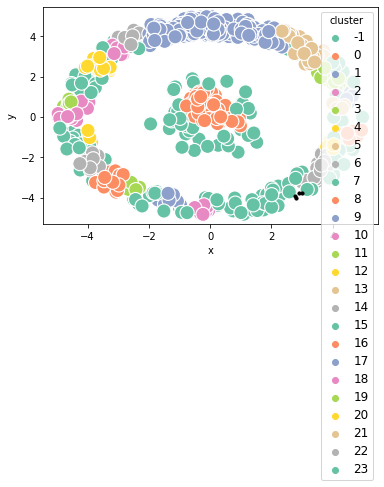

In [ ]:
# grab only clustered data points
outliers = d4[d4['cluster']==24]

fig,(axes) = plt.subplots(1,1)
axes.legend()
sns.scatterplot('x', 'y',data=d4[d4['cluster']!=24], hue='cluster', ax=axes, palette='Set2', legend='full', s=200)
axes.scatter(outliers['x'], outliers['y'], s=10, label='outliers', c="k")
plt.setp(axes.get_legend().get_texts(), fontsize='12')
plt.show()




### Compare

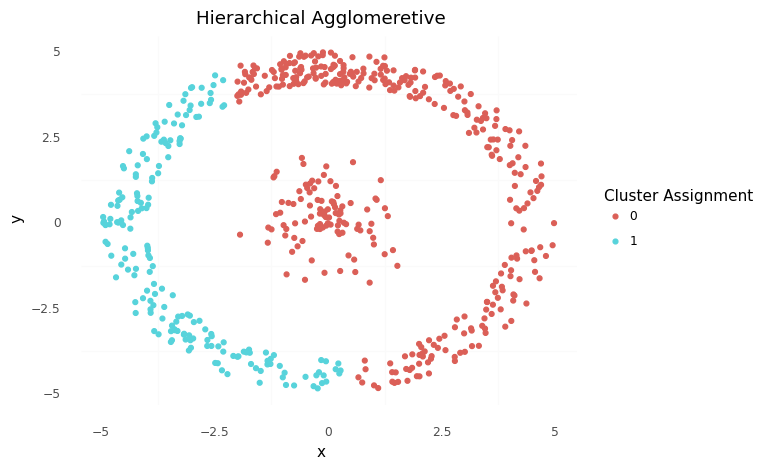

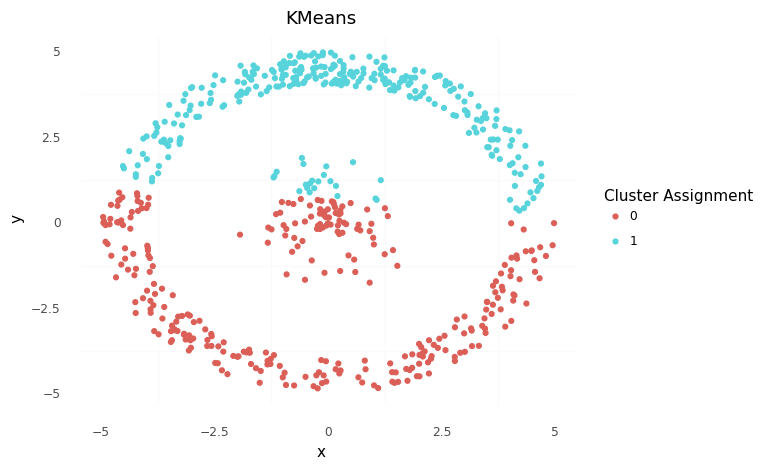

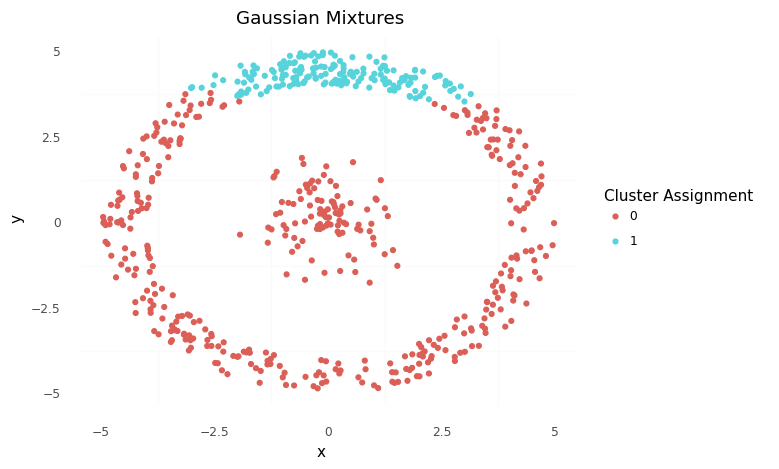

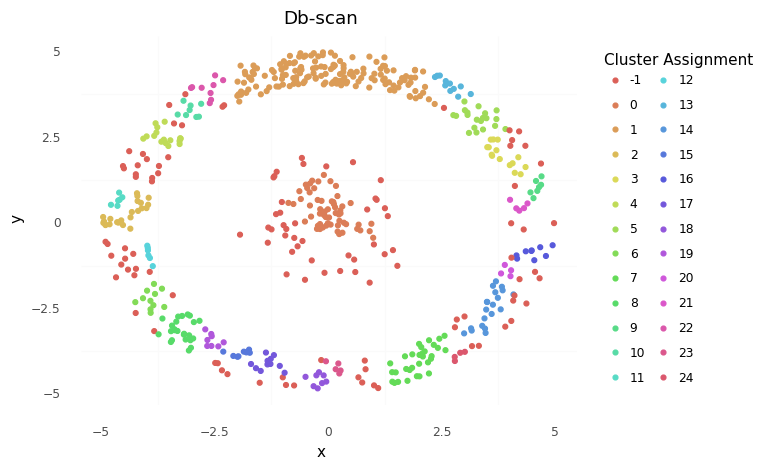

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)
scan = DBSCAN(eps = 0.3, min_samples = 5)
hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])
scan.fit(d4[["x","y"]])
d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])
d4["scan"]=scan.labels_

print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))
print(ggplot(d4, aes(x = "x", y = "y",
                        color = "factor(scan)")) +
                geom_point() +
                theme_minimal() +
                scale_color_discrete(name = "Cluster Assignment") +
                theme(panel_grid_major = element_blank()) +
                 labs(title = "Db-scan"))

In [ ]:
print("Score for Hirarical Clustering:",silhouette_score(d4,d4["hac"]))
print("Score for Kmeans Clustering:",silhouette_score(d4,d4["km"]))
print("Score for Gaussian Mixture Clustering:",silhouette_score(d4,d4["gm"]))
print("Score for Dbscan Clustering:",silhouette_score(d4,d4["scan"]))

Score for Hirarical Clustering: 0.26752114735957166
Score for Kmeans Clustering: 0.22383138594175478
Score for Gaussian Mixture Clustering: 0.13351898808184512
Score for Dbscan Clustering: 0.061453652070560236


In [ ]:
print("The best is hirarical")

The best is hirarical


# Compare for data set3

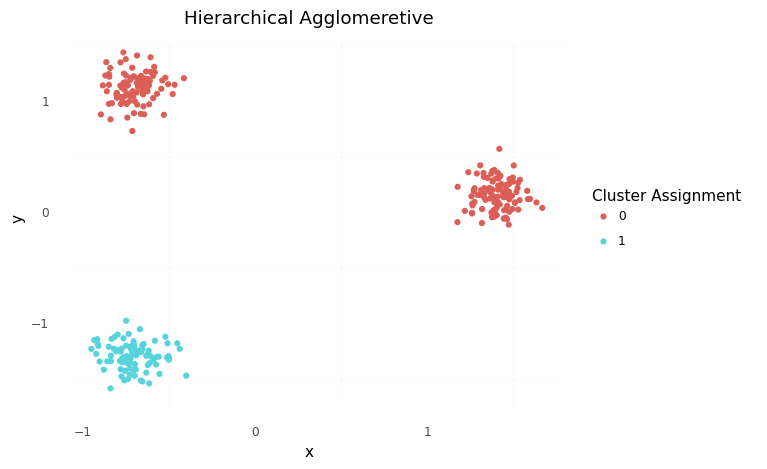

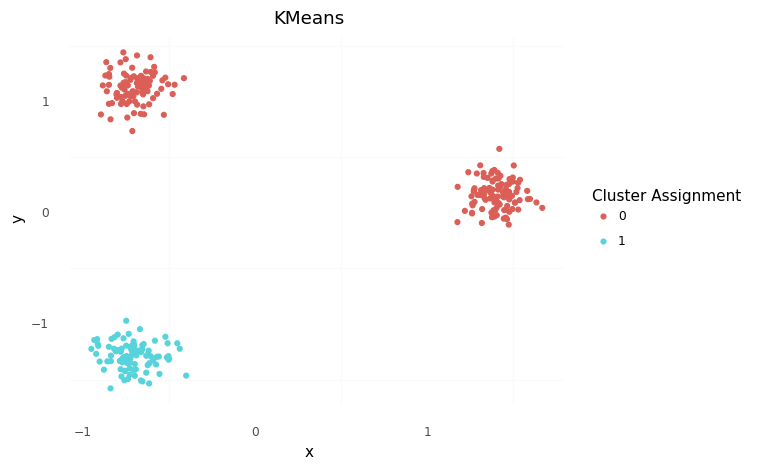

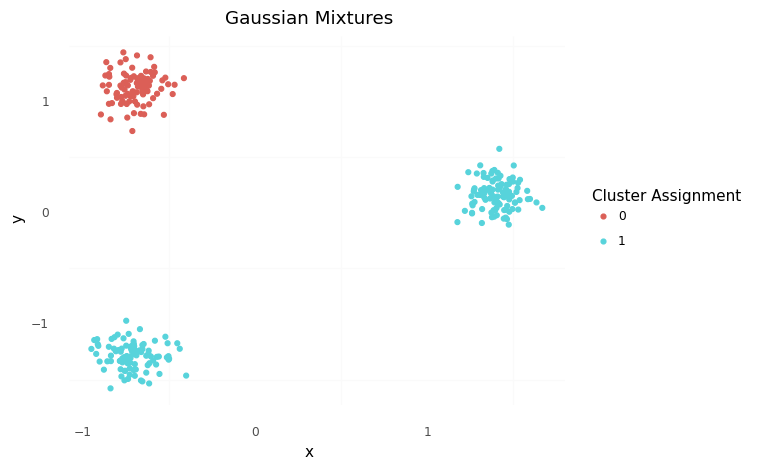

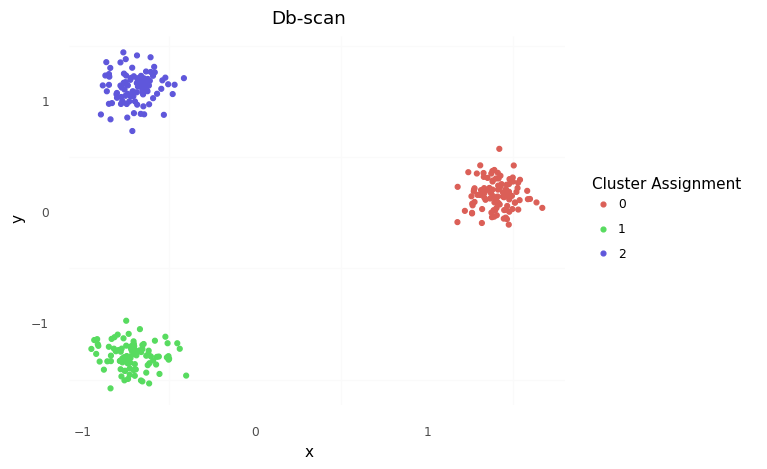

In [ ]:
hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)
scan = DBSCAN(eps = 0.4, min_samples = 5)
hac.fit(d3[["x","y"]])
km.fit(d3[["x","y"]])
gm.fit(d3[["x","y"]])
scan.fit(d3[["x","y"]])
d3["hac"] = hac.labels_
d3["km"] = km.labels_
d3["gm"] = gm.predict(d3[["x","y"]])
d3["scan"]=scan.labels_

print(ggplot(d3, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d3, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d3, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))
print(ggplot(d3, aes(x = "x", y = "y",
                        color = "factor(scan)")) +
                geom_point() +
                theme_minimal() +
                scale_color_discrete(name = "Cluster Assignment") +
                theme(panel_grid_major = element_blank()) +
                 labs(title = "Db-scan"))

In [ ]:
print("Score for Hirarical Clustering:",silhouette_score(d3,d3["hac"]))
print("Score for Kmeans Clustering:",silhouette_score(d3,d3["km"]))
print("Score for Gaussian Mixture Clustering:",silhouette_score(d3,d3["gm"]))
print("Score for Dbscan Clustering:",silhouette_score(d3,d3["scan"]))

Score for Hirarical Clustering: 0.5709620021263142
Score for Kmeans Clustering: 0.5709620021263142
Score for Gaussian Mixture Clustering: 0.6525689107984415
Score for Dbscan Clustering: 0.9381301871920164


In [ ]:
print("The best is Dbscan")

The best is Dbscan


# Compare for data set2

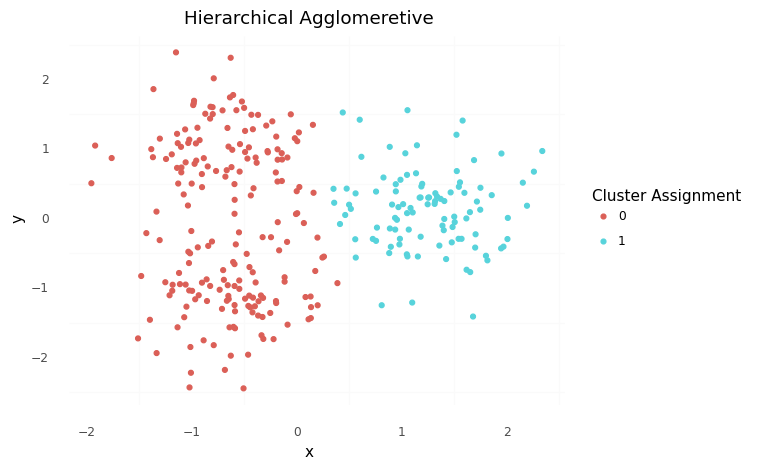

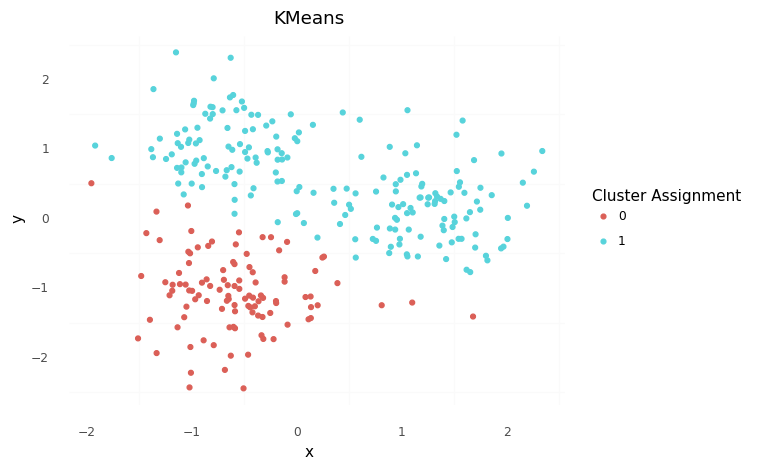

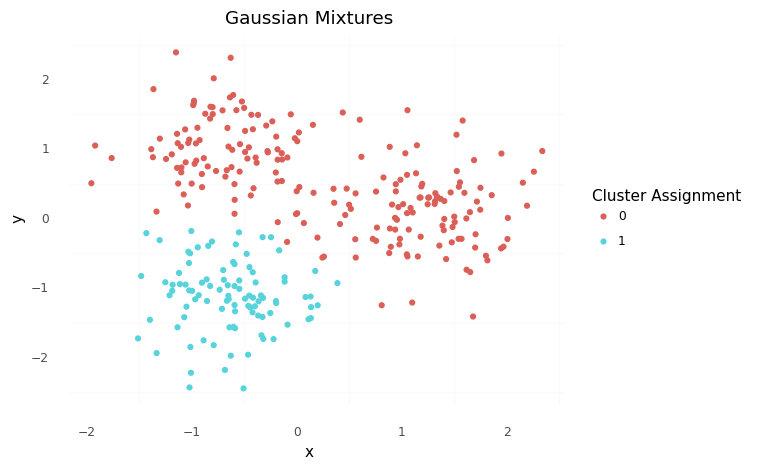

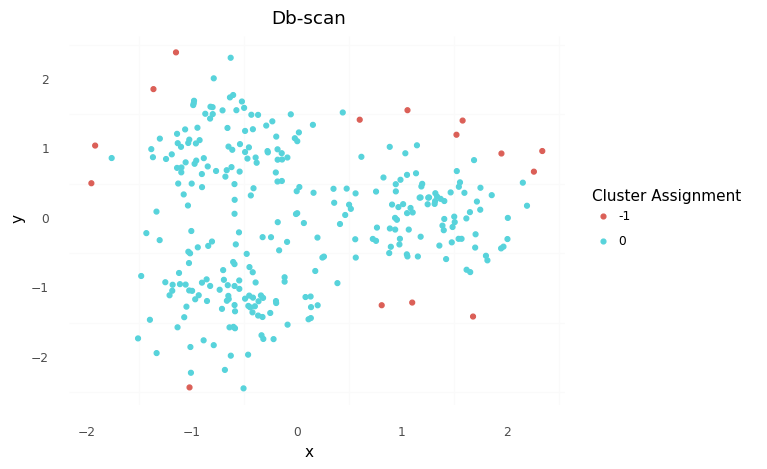

In [ ]:
hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)
scan = DBSCAN(eps = 0.4, min_samples = 5)
hac.fit(d2[["x","y"]])
km.fit(d2[["x","y"]])
gm.fit(d2[["x","y"]])
scan.fit(d2[["x","y"]])
d2["hac"] = hac.labels_
d2["km"] = km.labels_
d2["gm"] = gm.predict(d2[["x","y"]])
d2["scan"]=scan.labels_

print(ggplot(d2, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d2, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d2, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))
print(ggplot(d2, aes(x = "x", y = "y",
                        color = "factor(scan)")) +
                geom_point() +
                theme_minimal() +
                scale_color_discrete(name = "Cluster Assignment") +
                theme(panel_grid_major = element_blank()) +
                 labs(title = "Db-scan"))

In [ ]:
print("Score for Hirarical Clustering:",silhouette_score(d2,d2["hac"]))
print("Score for Kmeans Clustering:",silhouette_score(d2,d2["km"]))
print("Score for Gaussian Mixture Clustering:",silhouette_score(d2,d2["gm"]))
print("Score for Dbscan Clustering:",silhouette_score(d2,d2["scan"]))

Score for Hirarical Clustering: 0.4348703575894586
Score for Kmeans Clustering: 0.4745261393658313
Score for Gaussian Mixture Clustering: 0.47263334085944486
Score for Dbscan Clustering: 0.31273230813329045


In [ ]:
print("The best is  kmeans")

The best is  kmeans


# Compare for data set1

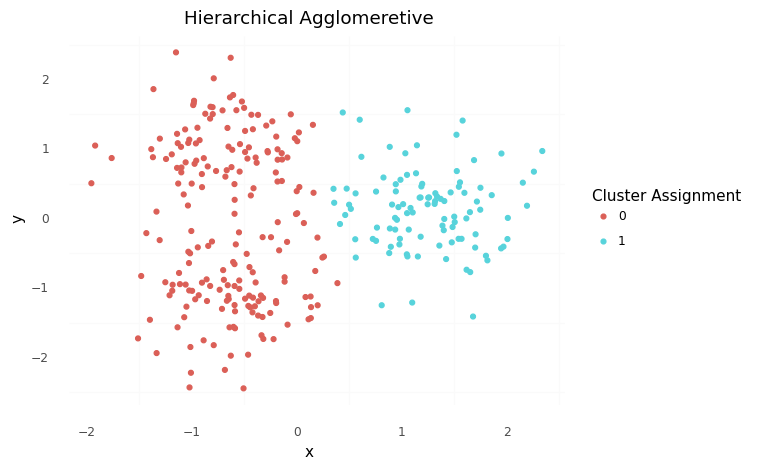

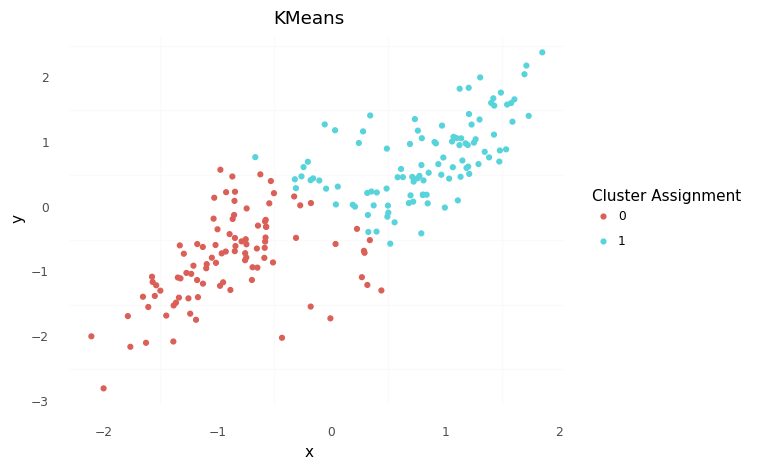

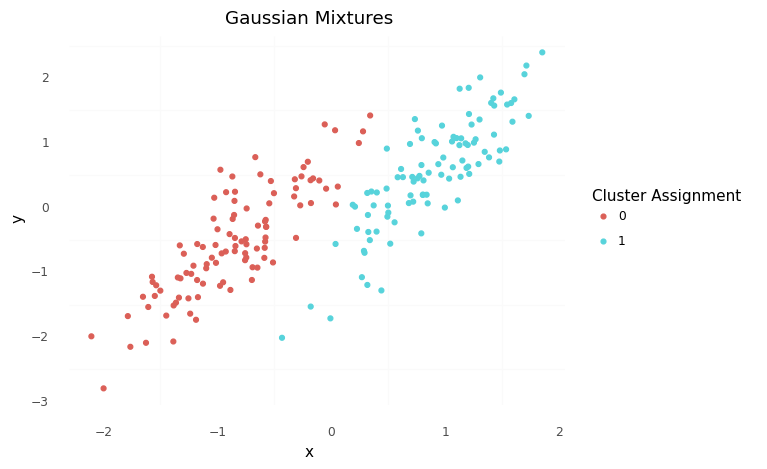

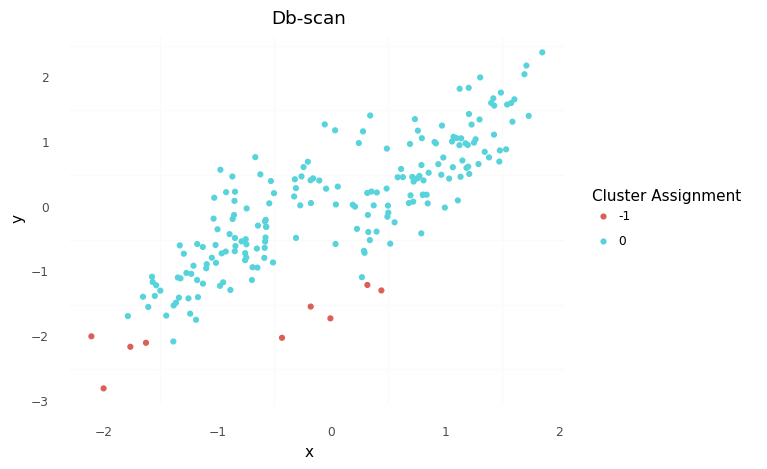

In [ ]:
hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)
scan = DBSCAN(eps = 0.4, min_samples = 5)
hac.fit(d1[["x","y"]])
km.fit(d1[["x","y"]])
gm.fit(d1[["x","y"]])
scan.fit(d1[["x","y"]])
d1["hac"] = hac.labels_
d1["km"] = km.labels_
d1["gm"] = gm.predict(d1[["x","y"]])
d1["scan"]=scan.labels_

print(ggplot(d2, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d1, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d1, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))
print(ggplot(d1, aes(x = "x", y = "y",
                        color = "factor(scan)")) +
                geom_point() +
                theme_minimal() +
                scale_color_discrete(name = "Cluster Assignment") +
                theme(panel_grid_major = element_blank()) +
                 labs(title = "Db-scan"))

In [ ]:
print("Score for Hirarical Clustering:",silhouette_score(d1,d1["hac"]))
print("Score for Kmeans Clustering:",silhouette_score(d1,d1["km"]))
print("Score for Gaussian Mixture Clustering:",silhouette_score(d1,d1["gm"]))
print("Score for Dbscan Clustering:",silhouette_score(d1,d1["scan"]))

Score for Hirarical Clustering: 0.5343548379045948
Score for Kmeans Clustering: 0.5550337502962247
Score for Gaussian Mixture Clustering: 0.49797541108303833
Score for Dbscan Clustering: 0.3338964511693401


In [ ]:
print("The best is kmeans")

The best is kmeans


## Dataset 5

In [ ]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")


In [ ]:
db5 = DBSCAN(eps = 0.5, min_samples = 15).fit(d5)


In [ ]:
d5['cluster']=db5.labels_

In [ ]:
d5.cluster.value_counts().to_frame()

,cluster
2,300
1,100
0,48
-1,2


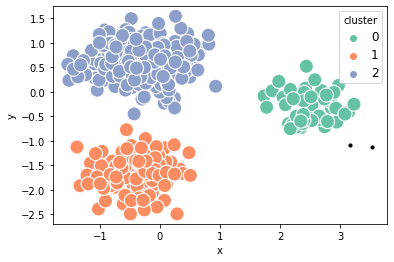

In [ ]:
# grab only clustered data points
outliers = d5[d5['cluster']==-1]

fig,(axes) = plt.subplots(1,1)
axes.legend()
sns.scatterplot('x', 'y',data=d5[d5['cluster']!=-1], hue='cluster', ax=axes, palette='Set2', legend='full', s=200)
axes.scatter(outliers['x'], outliers['y'], s=10, label='outliers', c="k")
plt.setp(axes.get_legend().get_texts(), fontsize='12')
plt.show()




# Compare for data set5



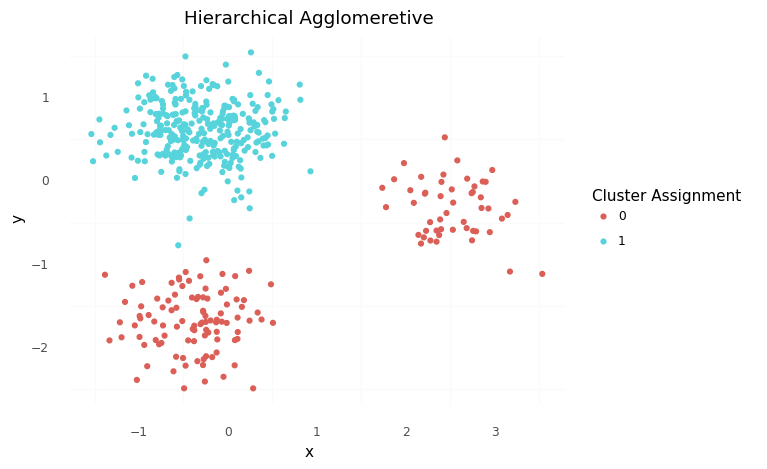

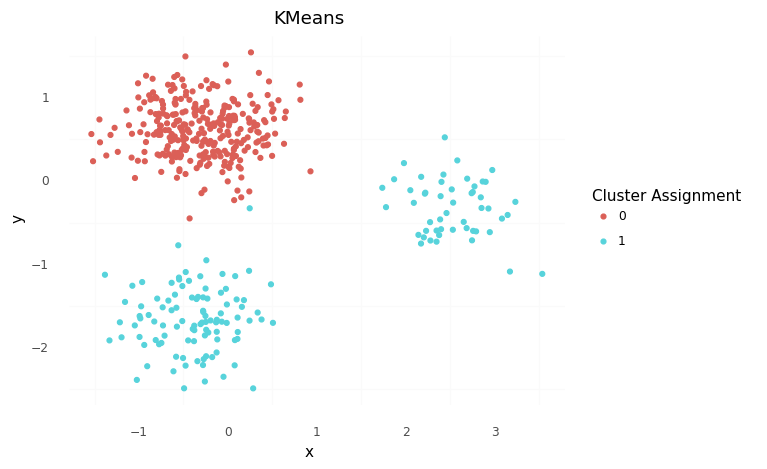

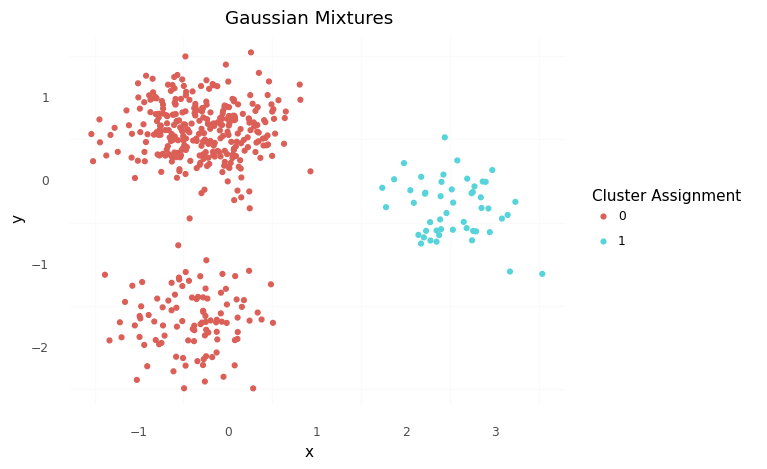

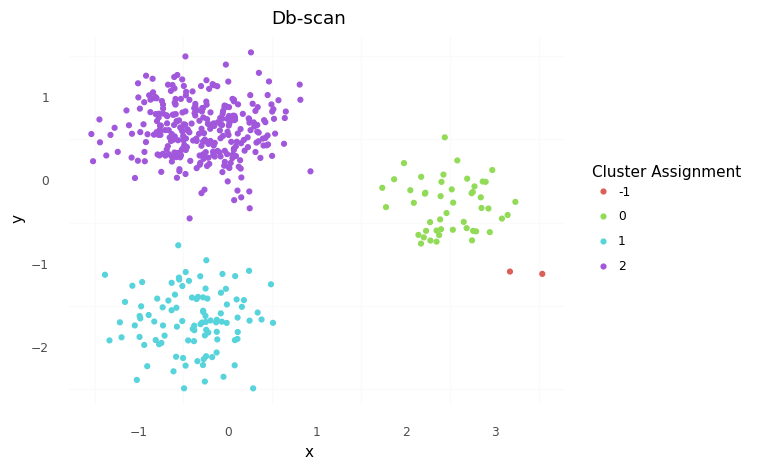

In [ ]:
hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)
scan = DBSCAN(eps = 0.5, min_samples = 15)
hac.fit(d5[["x","y"]])
km.fit(d5[["x","y"]])
gm.fit(d5[["x","y"]])
scan.fit(d5[["x","y"]])
d5["hac"] = hac.labels_
d5["km"] = km.labels_
d5["gm"] = gm.predict(d5[["x","y"]])
d5["scan"]=scan.labels_

print(ggplot(d5, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d5, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d5, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))
print(ggplot(d5, aes(x = "x", y = "y",
                        color = "factor(scan)")) +
                geom_point() +
                theme_minimal() +
                scale_color_discrete(name = "Cluster Assignment") +
                theme(panel_grid_major = element_blank()) +
                 labs(title = "Db-scan"))

In [ ]:
print("Score for Hirarical Clustering:",silhouette_score(d5,d5["hac"]))
print("Score for Kmeans Clustering:",silhouette_score(d5,d5["km"]))
print("Score for Gaussian Mixture Clustering:",silhouette_score(d5,d5["gm"]))
print("Score for Dbscan Clustering:",silhouette_score(d5,d5["scan"]))

Score for Hirarical Clustering: 0.6772694868757907
Score for Kmeans Clustering: 0.6759246671880424
Score for Gaussian Mixture Clustering: 0.6382043706933799
Score for Dbscan Clustering: 0.762560605042364


In [ ]:
print("The best is  Dbscan")

The best is  Dbscan


# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

In [ ]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")
d6.head()

,x,y
0,0.712520,0.653491
1,0.910914,0.068242
2,0.750752,0.526512
3,0.666605,0.584747
4,0.403062,0.956459


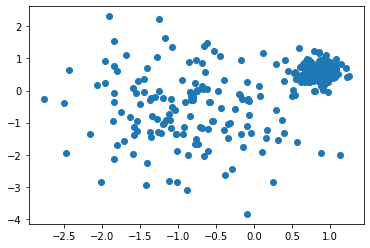

In [ ]:
plt.scatter(d6['x'],d6['y'])
plt.show()

[598.0000000000002, 245.45139384642772, 146.91828825139729, 118.633690934422, 93.60621058420207, 76.38902444744943, 63.11054311306251, 56.67215369050345, 50.672480848854484, 46.292809354327325]


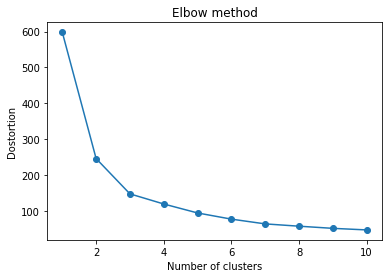

In [ ]:
# we ask for 4 nearest, because the data point it self (distance = 0) is included
from sklearn.cluster import KMeans
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(d6)
    inertias.append(kmeans.inertia_)


print(inertias)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Dostortion')
plt.show() 